<b><font color="SteelBlue" size="+3">Classifiez automatiquement des biens de consommation</font></b>

# Introduction

## Contexte

Nous sommes au cœur d'un projet innovant chez "Place de marché", une entreprise qui s'apprête à lancer une marketplace e-commerce dynamique et multilingue. Dans cet univers, les vendeurs ont l'opportunité de présenter leurs articles aux acheteurs potentiels en partageant des photos et des descriptions des produits. Actuellement, la classification des articles en catégories est un processus manuel et sujet à erreurs, ce qui présente des défis en termes de fiabilité et d'efficacité. Avec un volume d'articles qui augmente, il devient primordial d'automatiser cette classification pour améliorer l'expérience utilisateur tant pour les vendeurs, en simplifiant le processus de mise en ligne, que pour les acheteurs, en rendant la recherche de produits plus intuitive.

## Objectifs

L'objectif principal est de développer un moteur de classification automatique qui utilisera à la fois le texte et l'image pour catégoriser efficacement les produits. Ce moteur devra être capable d'analyser les descriptions textuelles et visuelles pour regrouper les articles dans les catégories adéquates. Pour y parvenir, il est essentiel de mettre en œuvre des méthodes avancées de traitement du langage naturel (NLP) ainsi que des techniques de vision par ordinateur pour extraire des caractéristiques pertinentes des données. L'étape finale consistera à projeter ces caractéristiques dans un espace à deux dimensions, facilitant ainsi l'analyse et la segmentation en clusters. Ce projet vise à valider la faisabilité de cette approche de classification, qui est cruciale pour le passage à l'échelle de la marketplace.

## Imports

In [1]:
# Chargement des librairies
# Builtin
import os

# Data
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# NLP
import nltk
from nltk.probability import FreqDist

#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#import string

# Reduction
from sklearn.decomposition import PCA

# autres
#import re

# local
from Deveau_Estelle_2_NLP_func_042024 import *

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\estel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\estel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\estel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Data

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'data',
 'Deveau_Estelle_1_notebook_pretraitement_feature_extraction_faisaibilite_042024.ipynb',
 'Deveau_Estelle_2_NLP_func_042024.py',
 'pythonProject',
 'Weather_Images_CNN_Transfer_Learning_Stage_1_feasibility_V1.0.ipynb',
 '__pycache__']

In [3]:
os.listdir("data/sources/")

['Dataset+projet+prétraitement+textes+images.zip',
 'flipkart_com-ecommerce_sample_1050.csv',
 'Images']

In [4]:
path     = "./data/sources/"
filename = "flipkart_com-ecommerce_sample_1050.csv"

In [5]:
data = pd.read_csv(path + filename)

In [6]:
# Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_colwidth', None)

# Exploration des données

## Quick tour

In [7]:
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [8]:
data.shape

(1050, 15)

In [9]:
data.dtypes.value_counts()

object     12
float64     2
bool        1
Name: count, dtype: int64

In [10]:
data.describe()

,retail_price,discounted_price
count,1049.000000,1049.000000
mean,2186.197331,1584.527169
std,7639.229411,7475.099680
min,35.000000,35.000000
25%,555.000000,340.000000
50%,999.000000,600.000000
75%,1999.000000,1199.000000
max,201000.000000,201000.000000


In [11]:
data.nunique()

uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
dtype: int64

In [12]:
# Valeurs manquantes
missing_values_count = data.isnull().sum()
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print('Le pourcentage de valeurs manquantes est de', round(percent_missing, 2),'%')

Le pourcentage de valeurs manquantes est de 2.17 %


In [13]:
percent_missing_values =  round((missing_values_count / len(data)) * 100, 2)
missing_data = pd.concat([missing_values_count, percent_missing_values], axis=1, keys=['Nombre de valeurs manquantes', 'Pourcentage de valeurs manquantes'])
display(missing_data)

,Nombre de valeurs manquantes,Pourcentage de valeurs manquantes
uniq_id,0,0.00
crawl_timestamp,0,0.00
product_url,0,0.00
product_name,0,0.00
product_category_tree,0,0.00
pid,0,0.00
retail_price,1,0.10
discounted_price,1,0.10
image,0,0.00
is_FK_Advantage_product,0,0.00


<Axes: title={'center': 'Valeurs présentes dans notre jeu de données'}>

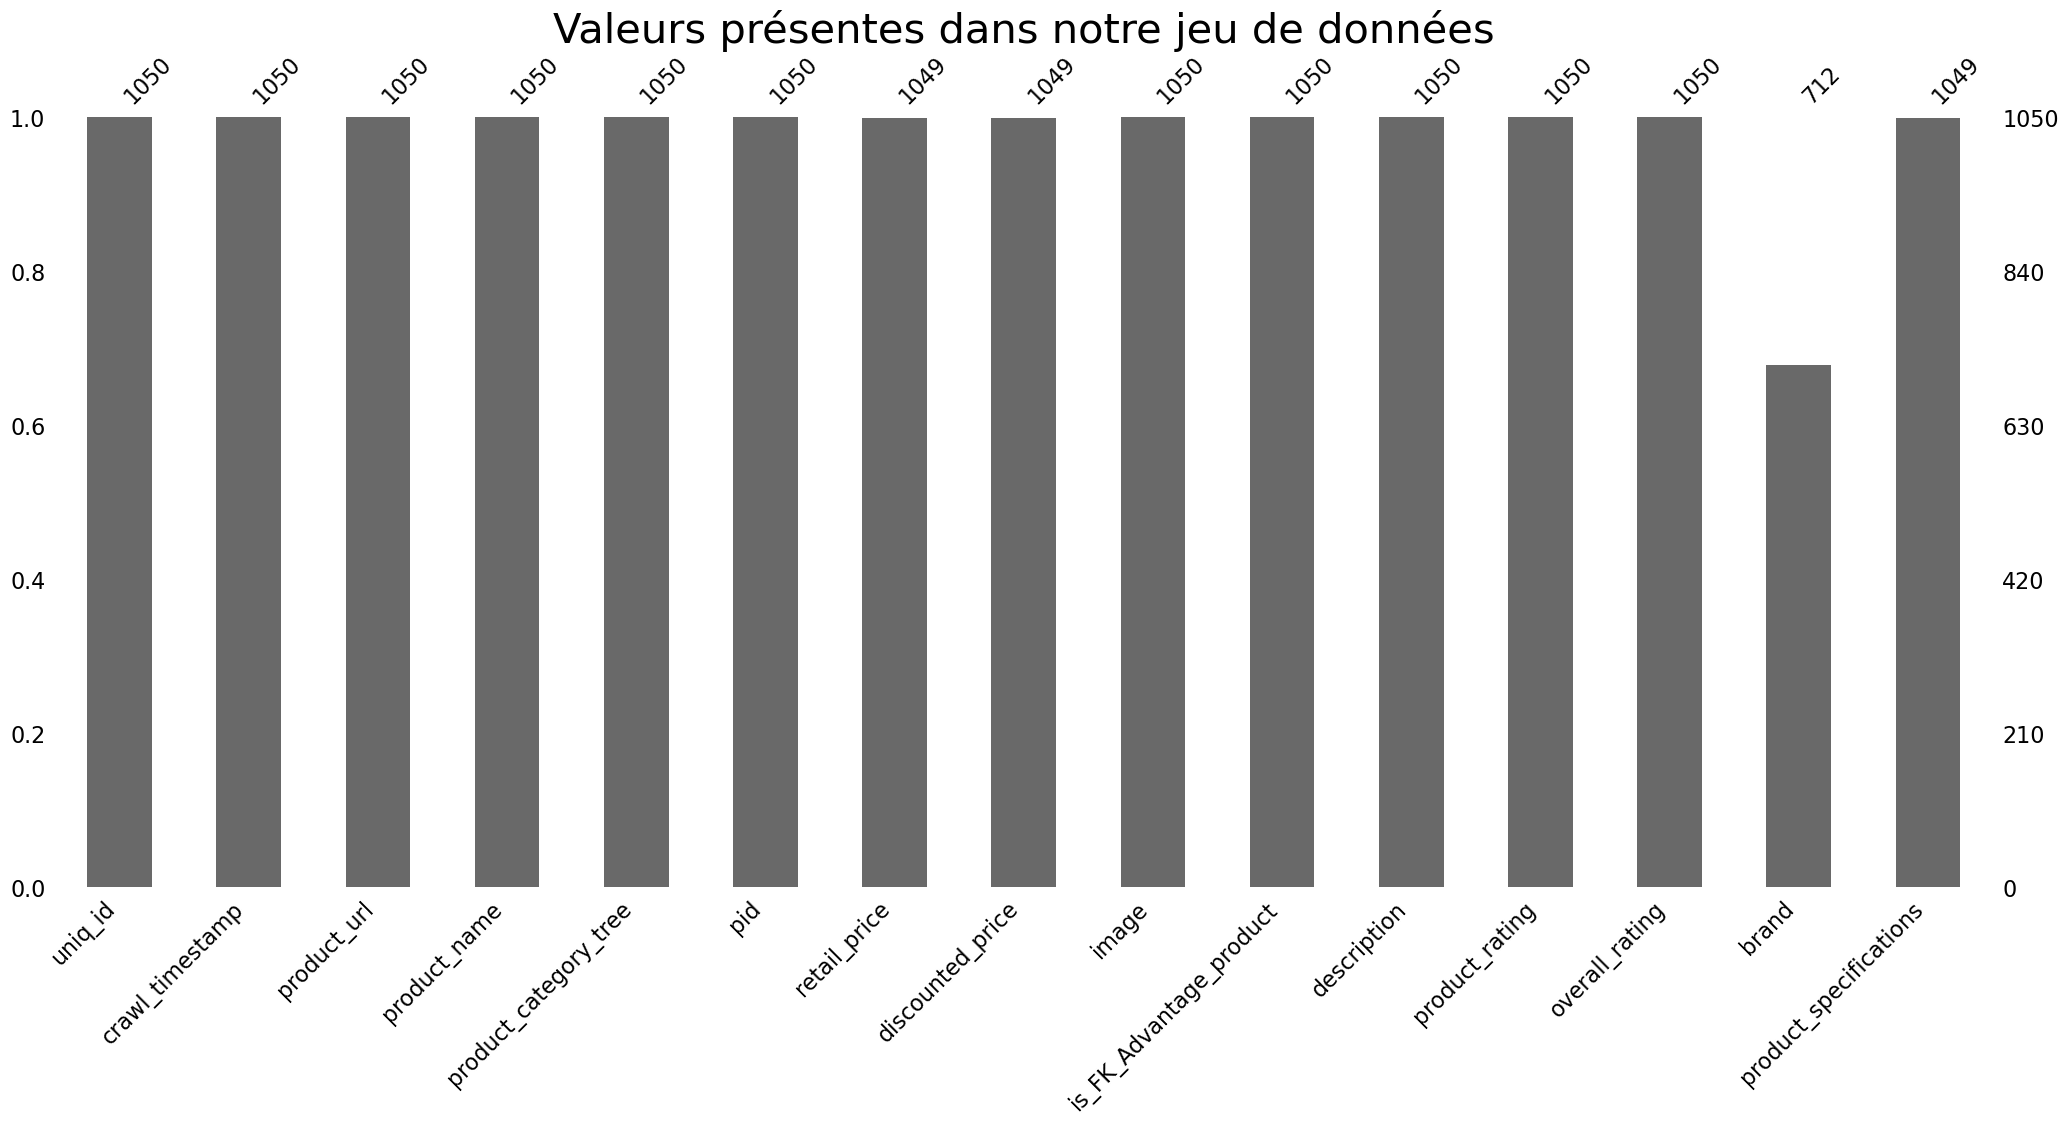

In [14]:
plt.title("Valeurs présentes dans notre jeu de données", fontsize=30)
msno.bar(data)

<Axes: >

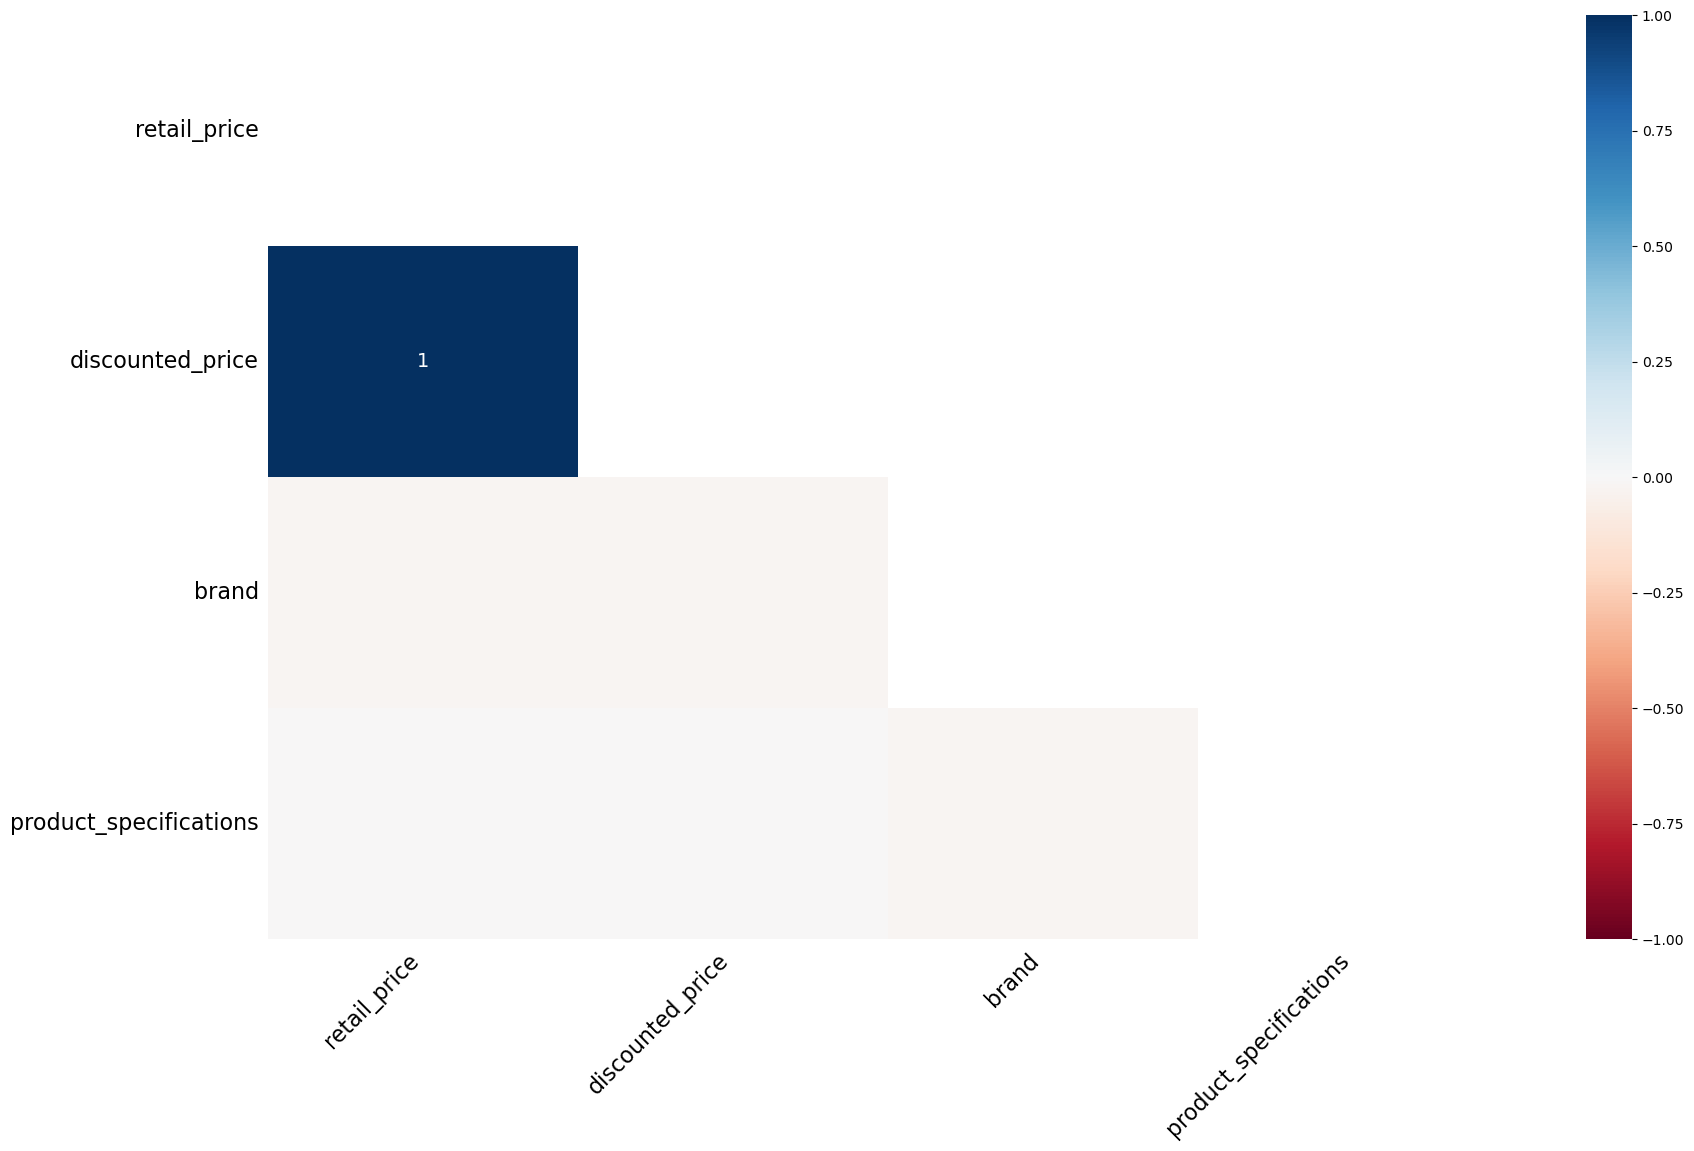

In [15]:
msno.heatmap(data)

## Compréhension des Variables

In [16]:
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


<b>uniq_id</b> : Un identifiant unique pour chaque entrée de produit.<br>
<b>crawl_timestamp</b> : La date et l'heure de la collecte des données pour chaque produit.<br>
<b>product_url</b> : L'URL directe du produit sur le site de Flipkart.<br>
<b>product_name</b> : Le nom du produit.<br>
<b>product_category_tree</b> : Une chaîne de caractères représentant la catégorie et les sous-catégories du produit dans l'arborescence des catégories de Flipkart.<br>
<b>pid</b> : Un identifiant de produit spécifique à Flipkart.<br>
<b>retail_price</b> : Le prix de vente conseillé du produit.<br>
<b>discounted_price</b> : Le prix remisé du produit.<br>
<b>image</b> : Le nom de fichier de l'image du produit semble être uniq_id.jpg.<br>
<b>is_FK_Advantage_product</b> : Un booléen indiquant si le produit est vendu sous le programme Flipkart Advantage.<br>
<b>description</b> : Une brève description du produit.<br>
<b>product_rating</b> : La note du produit donnée par les utilisateurs<br>
<b>overall_rating</b> : Semblable à product_rating<br>
<b>brand</b> : La marque du produit.<br>
<b>product_specifications</b> : Un champ structuré contenant des spécifications détaillées du produit, telles que la matière, la marque, etc., probablement sous forme d'un dictionnaire ou d'un objet JSON.<br>

In [17]:
# Vérification de la correspondance entre 'image' et 'uniq_id' + '.jpg'
data['check'] = data['image'] == (data['uniq_id'] + '.jpg')

# Vérifier si toutes les lignes respectent cette condition
all_match = data['check'].all()

print(f"Toutes les entrées dans 'image' correspondent à 'uniq_id.jpg' : {all_match}")


Toutes les entrées dans 'image' correspondent à 'uniq_id.jpg' : True


In [18]:
# Liste de toutes les colonnes à conserver
cols_to_keep = ['uniq_id', 'product_category_tree', 'description']

# Pré-traitement des Données

In [19]:
df = data[cols_to_keep]

In [20]:
df.head(5)

,uniq_id,product_category_tree,description
0,55b85ea15a1536d46b7190ad6fff8ce7,"[""Home Furnishing >> Curtains & Accessories >>...",Key Features of Elegance Polyester Multicolor ...
1,7b72c92c2f6c40268628ec5f14c6d590,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Specifications of Sathiyas Cotton Bath Towel (...
2,64d5d4a258243731dc7bbb1eef49ad74,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Key Features of Eurospa Cotton Terry Face Towe...
3,d4684dcdc759dd9cdf41504698d737d8,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of SANTOSH ROYAL FASHION Cotton P...
4,6325b6870c54cd47be6ebfbffa620ec7,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of Jaipur Print Cotton Floral Kin...


In [21]:
df.nunique()

uniq_id                  1050
product_category_tree     642
description              1050
dtype: int64

## Récupération des catégories

In [22]:
# Transformation de 'product_category_tree' en 'product_category'
df = df.copy()
df['product_category'] = df['product_category_tree'].apply(lambda x: x.split('>>')[0].strip('[" '))
df = df[['uniq_id', 'product_category', 'description']]

df.head(5)

,uniq_id,product_category,description
0,55b85ea15a1536d46b7190ad6fff8ce7,Home Furnishing,Key Features of Elegance Polyester Multicolor ...
1,7b72c92c2f6c40268628ec5f14c6d590,Baby Care,Specifications of Sathiyas Cotton Bath Towel (...
2,64d5d4a258243731dc7bbb1eef49ad74,Baby Care,Key Features of Eurospa Cotton Terry Face Towe...
3,d4684dcdc759dd9cdf41504698d737d8,Home Furnishing,Key Features of SANTOSH ROYAL FASHION Cotton P...
4,6325b6870c54cd47be6ebfbffa620ec7,Home Furnishing,Key Features of Jaipur Print Cotton Floral Kin...


In [23]:
# Valeurs manquantes
missing_values_count = df.isnull().sum()
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print('Le pourcentage de valeurs manquantes est de', round(percent_missing, 2),'%')

Le pourcentage de valeurs manquantes est de 0.0 %


In [24]:
print("Valeurs uniques pour product_category dans df:", df['product_category'].unique())

Valeurs uniques pour product_category dans df: ['Home Furnishing' 'Baby Care' 'Watches' 'Home Decor & Festive Needs'
 'Kitchen & Dining' 'Beauty and Personal Care' 'Computers']


In [25]:
df.product_category.value_counts()

product_category
Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: count, dtype: int64

<Axes: ylabel='count'>

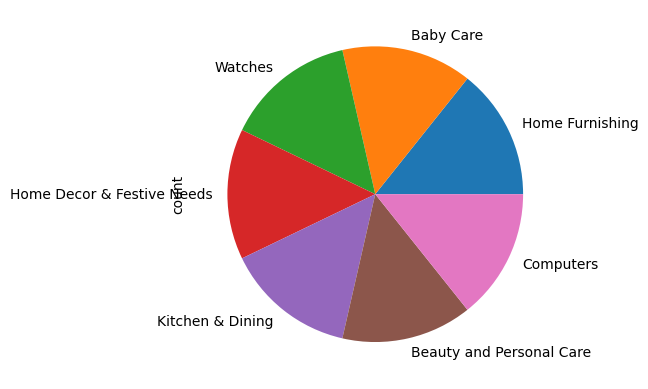

In [26]:
df.product_category.value_counts().plot(kind="pie")

## Taille des descriptions

In [27]:
lengths = df.description.apply(lambda i : len(i))

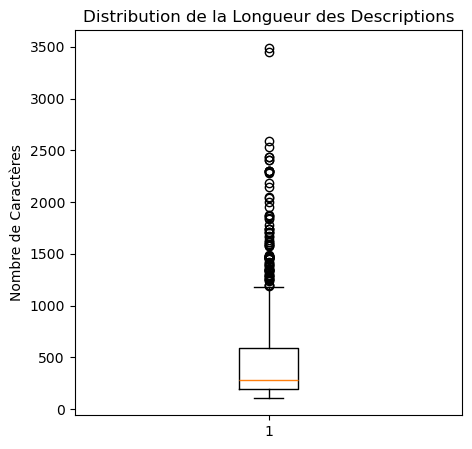

In [28]:
# Création d'un boxplot
plt.figure(figsize=(5, 5))
plt.boxplot(lengths)
plt.title('Distribution de la Longueur des Descriptions')
plt.ylabel('Nombre de Caractères')
plt.show()

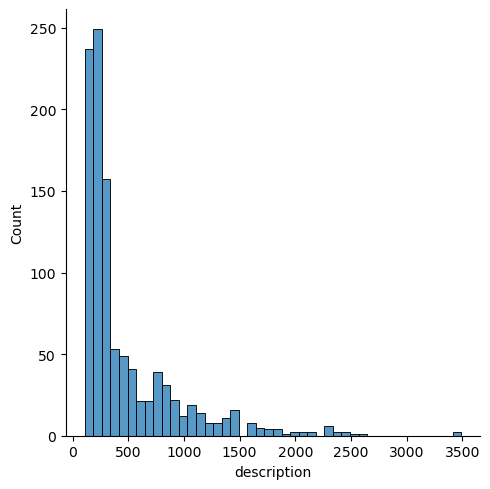

In [29]:
sns.displot(lengths)

In [30]:
df["_len_txt"] = lengths

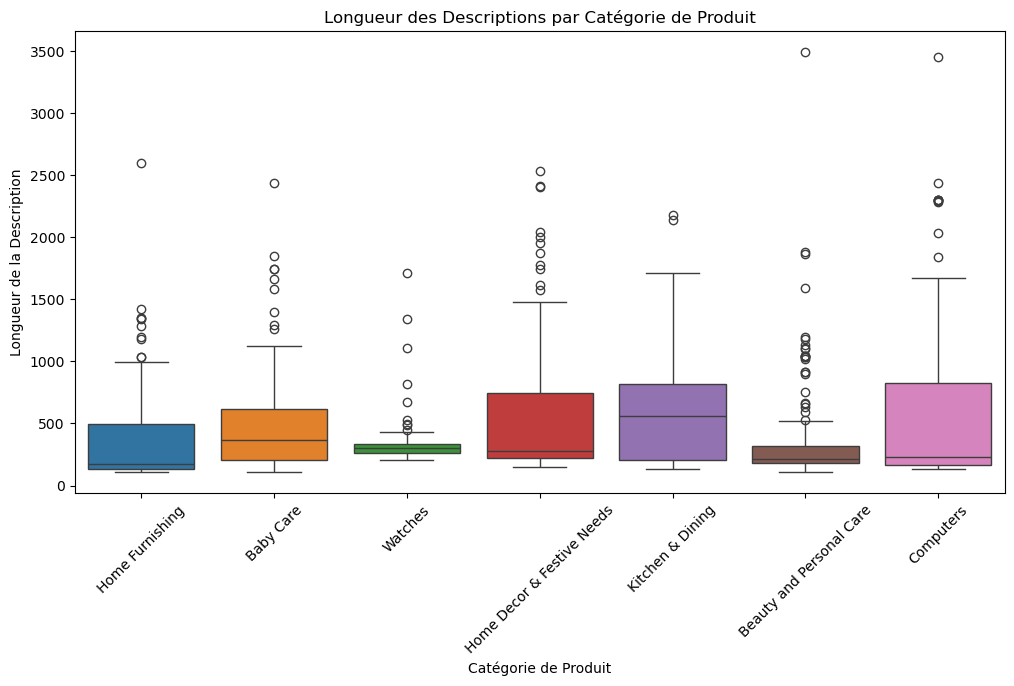

In [31]:
# Boxplot groupé
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_category', y='_len_txt', data=df, palette='tab10', hue='product_category')
plt.xticks(rotation=45)  # Cela aide si les noms des catégories sont longs ou nombreux
plt.title('Longueur des Descriptions par Catégorie de Produit')
plt.xlabel('Catégorie de Produit')
plt.ylabel('Longueur de la Description')
plt.show()

## Doublons

In [32]:
df.duplicated().sum()

0

In [33]:
df.duplicated(subset='description').sum()

0

## Sur un document

In [34]:
doc = df.description.sample(1)
doc = doc.values[0]
doc

'Buy Rajasthan Crafts Abstract Single Quilts & Comforters Pink at Rs. 840 at Flipkart.com. Only Genuine Products. Free Shipping. Cash On Delivery!'

### Nettoyage des descriptions

In [35]:
cleaned_text = process_text(doc, clean=True, tokenize_method=None, remove_stopwords=False, stemming=False, lemmatization=False)
print(cleaned_text)

buy rajasthan crafts abstract single quilts  comforters pink at rs  at flipkartcom only genuine products free shipping cash on delivery


### Tokenisation

Test de différent tokenizer

In [36]:
def display_tokens_info(tokens):
    print(f"nb tokens {len(tokens)}, nb tokens uniques {len(set(tokens))}")
    print(tokens)

#### Word_tokenize

In [37]:
tokens = process_text(doc, clean=True, tokenize_method='word_tokenize', remove_stopwords=False, stemming=False, lemmatization=False)
display_tokens_info(tokens)

nb tokens 20, nb tokens uniques 19
['buy', 'rajasthan', 'crafts', 'abstract', 'single', 'quilts', 'comforters', 'pink', 'at', 'rs', 'at', 'flipkartcom', 'only', 'genuine', 'products', 'free', 'shipping', 'cash', 'on', 'delivery']


#### Wordpunct_tokenize

In [38]:
tokens = process_text(doc, clean=True, tokenize_method='wordpunct', remove_stopwords=False, stemming=False, lemmatization=False)
display_tokens_info(tokens)

nb tokens 20, nb tokens uniques 19
['buy', 'rajasthan', 'crafts', 'abstract', 'single', 'quilts', 'comforters', 'pink', 'at', 'rs', 'at', 'flipkartcom', 'only', 'genuine', 'products', 'free', 'shipping', 'cash', 'on', 'delivery']


#### Regex Tokenize

In [39]:
tokens = process_text(doc, clean=True, tokenize_method='regex', remove_stopwords=False, stemming=False, lemmatization=False)
display_tokens_info(tokens)

nb tokens 20, nb tokens uniques 19
['buy', 'rajasthan', 'crafts', 'abstract', 'single', 'quilts', 'comforters', 'pink', 'at', 'rs', 'at', 'flipkartcom', 'only', 'genuine', 'products', 'free', 'shipping', 'cash', 'on', 'delivery']


=> Résultats équivalents

### Suppression des Stop words

In [40]:
cleaned_text = process_text(doc, clean=True, tokenize_method='word_tokenize', remove_stopwords=True, stemming=False, lemmatization=False)
print(cleaned_text)

['buy', 'rajasthan', 'crafts', 'abstract', 'single', 'quilts', 'comforters', 'pink', 'rs', 'flipkartcom', 'genuine', 'products', 'free', 'shipping', 'cash', 'delivery']


### Stemming

In [41]:
cleaned_text = process_text(doc, clean=True, tokenize_method='word_tokenize', remove_stopwords=True, stemming=True, lemmatization=False)
print(cleaned_text)

['buy', 'rajasthan', 'craft', 'abstract', 'singl', 'quilt', 'comfort', 'pink', 'rs', 'flipkartcom', 'genuin', 'product', 'free', 'ship', 'cash', 'deliveri']


### Lemmatization

In [42]:
cleaned_text = process_text(doc, clean=True, tokenize_method='word_tokenize', remove_stopwords=True, stemming=False, lemmatization=True)
print(cleaned_text)

['buy', 'rajasthan', 'craft', 'abstract', 'single', 'quilt', 'comforter', 'pink', 'r', 'flipkartcom', 'genuine', 'product', 'free', 'shipping', 'cash', 'delivery']


=> A première vue, la lemmatization favorisera une meilleure distinction sémantique entre les catégories.

## Sur l'ensemble des documents

In [43]:
# Application de la fonction 'process_text' à toutes les descriptions
df['description'] = df['description'].apply(lambda x: process_text(x, clean=True, 
                                                                   tokenize_method='word_tokenize', 
                                                                   remove_stopwords=True, 
                                                                   stemming=False, 
                                                                   lemmatization=True))

# Exploratory Data Analysis